In [60]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


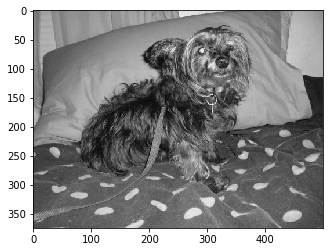

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/Suporte/Desktop/petImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [31]:
print ( img_array )


[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


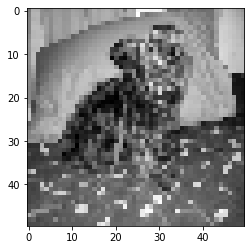

In [62]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

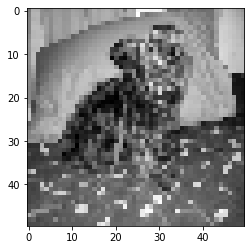

In [63]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()



# reservar algumas imagens para o teste final

criando manualmente um diretório chamado Testinge, em seguida, criar 2 diretórios dentro dele, um para Doge outro para Cat. A partir daqui, vou apenas mover as 15 primeiras imagens de ambas Doge Catpara as versões de treinamento. Mova-os, não copie. Usaremos isso para nossos testes finais.

In [64]:
training_data  =  [] 

def create_training_data():
    for category in CATEGORIES:  #  cães e gatos 
        # cria caminho para cães e gatos 
        path = os.path.join(DATADIR,category)  
        # obtém a classificação (0 ou 1). 0 = cão 1 = gato 
        class_num = CATEGORIES.index(category)  

         # itere sobre cada imagem por 
        for img in tqdm(os.listdir(path)):  
            try:
                # convertido a matriz 
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                # redimensione para normalizar o tamanho dos dados 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                 # adicione isso aos nossos dados de treinamento, 
                training_data.append([new_array, class_num]) 
                 # no interesse em manter a saída limpa ... 
            except Exception as e: 
                pass
          # exceto OSError como e: 
            # print ("OSErrroBad img provavelmente", e, os.path.join ( path, img)) 
            #except Exceção como e: 
            # print ("exceção geral", e, os.path.join (path, img)) 

create_training_data()

print(len(training_data))


 46%|████▌     | 5689/12501 [00:17<00:19, 345.29it/s]


 88%|████████▊ | 10974/12501 [00:33<00:04, 373.31it/s]


100%|██████████| 12501/12501 [00:37<00:00, 329.36it/s]

 42%|████▏     | 5272/12501 [00:12<00:19, 373.25it/s]


 93%|█████████▎| 11642/12501 [00:28<00:02, 397.82it/s]


100%|██████████| 12501/12501 [00:30<00:00, 403.50it/s]


24946


# embaralhar os dados

No momento, nossos dados são apenas todos os cães, depois todos os gatos. Isso geralmente acabará causando problemas também, pois, inicialmente, o classificador aprenderá a prever sempre os cães. Então ele mudará para oh, apenas preveja todos os gatos! Indo e voltando assim também não é bom.

In [65]:
import random

random.shuffle(training_data)

Nossa training_dataé uma lista, o que significa que é mutável, por isso agora está bem embaralhada. Podemos confirmar isso repetindo algumas das amostras iniciais e imprimindo a classe.

In [66]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
0
0
0
1
1
0


Ótimo, nós temos as aulas bem misturadas! Hora de fazer o nosso modelo!



In [67]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[210]
   [254]
   [248]
   ...
   [161]
   [152]
   [123]]

  [[186]
   [241]
   [237]
   ...
   [144]
   [169]
   [174]]

  [[249]
   [249]
   [245]
   ...
   [123]
   [116]
   [125]]

  ...

  [[ 97]
   [111]
   [109]
   ...
   [105]
   [104]
   [ 98]]

  [[ 90]
   [109]
   [106]
   ...
   [ 96]
   [ 96]
   [ 95]]

  [[ 85]
   [112]
   [118]
   ...
   [ 96]
   [ 95]
   [ 74]]]]


Vamos salvar esses dados, para que não precisemos continuar calculando-os sempre que quisermos brincar com o modelo de rede neural:



In [68]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

Sempre podemos carregá-lo em nosso script atual, ou um totalmente novo, fazendo:



EOFError: Ran out of input

Agora que obtivemos o conjunto de dados, estamos prontos para cobrir redes neurais convolucionais e implementar uma com nossos dados para classificação.

In [69]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [77]:
import pickle

pickle_in = open("X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
b = pickle.load(pickle_in)
y = np.array(b)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Train on 17462 samples, validate on 7484 samples
Epoch 1/3


 5856/17462 [=========>....................] - ETA: 1:10:03 - loss: 0.6948 - accuracy: 0.437 - ETA: 38:50 - loss: 0.9166 - accuracy: 0.4844  - ETA: 28:20 - loss: 0.8410 - accuracy: 0.520 - ETA: 23:01 - loss: 0.8023 - accuracy: 0.523 - ETA: 19:48 - loss: 0.7770 - accuracy: 0.537 - ETA: 17:44 - loss: 0.7709 - accuracy: 0.526 - ETA: 16:41 - loss: 0.7609 - accuracy: 0.526 - ETA: 15:27 - loss: 0.7549 - accuracy: 0.515 - ETA: 14:31 - loss: 0.7488 - accuracy: 0.510 - ETA: 13:45 - loss: 0.7448 - accuracy: 0.500 - ETA: 13:07 - loss: 0.7399 - accuracy: 0.502 - ETA: 12:35 - loss: 0.7351 - accuracy: 0.510 - ETA: 12:09 - loss: 0.7337 - accuracy: 0.502 - ETA: 11:46 - loss: 0.7310 - accuracy: 0.502 - ETA: 11:26 - loss: 0.7274 - accuracy: 0.516 - ETA: 11:08 - loss: 0.7250 - accuracy: 0.519 - ETA: 10:52 - loss: 0.7226 - accuracy: 0.527 - ETA: 10:38 - loss: 0.7197 - accuracy: 0.538 - ETA: 10:26 - loss: 0.7183 - accuracy: 0.537 - ETA: 10:16 - loss: 0.7166 - accuracy: 0.539 - ETA: 10:09 - loss: 0.7163 - a

11808/17462 [===================>..........] - ETA: 5:11 - loss: 0.6823 - accuracy: 0.55 - ETA: 5:11 - loss: 0.6826 - accuracy: 0.55 - ETA: 5:09 - loss: 0.6820 - accuracy: 0.55 - ETA: 5:08 - loss: 0.6824 - accuracy: 0.55 - ETA: 5:07 - loss: 0.6826 - accuracy: 0.55 - ETA: 5:07 - loss: 0.6825 - accuracy: 0.55 - ETA: 5:06 - loss: 0.6827 - accuracy: 0.55 - ETA: 5:05 - loss: 0.6822 - accuracy: 0.55 - ETA: 5:04 - loss: 0.6820 - accuracy: 0.55 - ETA: 5:03 - loss: 0.6820 - accuracy: 0.55 - ETA: 5:02 - loss: 0.6820 - accuracy: 0.55 - ETA: 5:01 - loss: 0.6817 - accuracy: 0.56 - ETA: 5:00 - loss: 0.6815 - accuracy: 0.56 - ETA: 4:59 - loss: 0.6813 - accuracy: 0.56 - ETA: 4:58 - loss: 0.6813 - accuracy: 0.56 - ETA: 4:57 - loss: 0.6812 - accuracy: 0.56 - ETA: 4:56 - loss: 0.6811 - accuracy: 0.56 - ETA: 4:55 - loss: 0.6810 - accuracy: 0.56 - ETA: 4:55 - loss: 0.6807 - accuracy: 0.56 - ETA: 4:54 - loss: 0.6807 - accuracy: 0.56 - ETA: 4:53 - loss: 0.6807 - accuracy: 0.56 - ETA: 4:52 - loss: 0.6807 - ac

17462/17462 [==============================] - ETA: 2:28 - loss: 0.6588 - accuracy: 0.59 - ETA: 2:27 - loss: 0.6586 - accuracy: 0.59 - ETA: 2:26 - loss: 0.6586 - accuracy: 0.59 - ETA: 2:26 - loss: 0.6585 - accuracy: 0.59 - ETA: 2:25 - loss: 0.6584 - accuracy: 0.59 - ETA: 2:24 - loss: 0.6582 - accuracy: 0.59 - ETA: 2:23 - loss: 0.6580 - accuracy: 0.60 - ETA: 2:23 - loss: 0.6580 - accuracy: 0.60 - ETA: 2:22 - loss: 0.6582 - accuracy: 0.60 - ETA: 2:21 - loss: 0.6579 - accuracy: 0.60 - ETA: 2:20 - loss: 0.6578 - accuracy: 0.60 - ETA: 2:19 - loss: 0.6577 - accuracy: 0.60 - ETA: 2:18 - loss: 0.6574 - accuracy: 0.60 - ETA: 2:18 - loss: 0.6575 - accuracy: 0.60 - ETA: 2:17 - loss: 0.6575 - accuracy: 0.60 - ETA: 2:16 - loss: 0.6572 - accuracy: 0.60 - ETA: 2:15 - loss: 0.6573 - accuracy: 0.60 - ETA: 2:14 - loss: 0.6573 - accuracy: 0.60 - ETA: 2:14 - loss: 0.6575 - accuracy: 0.60 - ETA: 2:13 - loss: 0.6572 - accuracy: 0.60 - ETA: 2:12 - loss: 0.6571 - accuracy: 0.60 - ETA: 2:11 - loss: 0.6569 - ac

 5888/17462 [=========>....................] - ETA: 9:52 - loss: 0.4536 - accuracy: 0.78 - ETA: 8:40 - loss: 0.5309 - accuracy: 0.70 - ETA: 8:15 - loss: 0.5524 - accuracy: 0.70 - ETA: 8:01 - loss: 0.5431 - accuracy: 0.73 - ETA: 7:51 - loss: 0.5337 - accuracy: 0.73 - ETA: 7:44 - loss: 0.5469 - accuracy: 0.73 - ETA: 7:53 - loss: 0.5644 - accuracy: 0.73 - ETA: 8:05 - loss: 0.5638 - accuracy: 0.73 - ETA: 8:01 - loss: 0.5695 - accuracy: 0.72 - ETA: 8:09 - loss: 0.5705 - accuracy: 0.71 - ETA: 8:42 - loss: 0.5812 - accuracy: 0.70 - ETA: 8:36 - loss: 0.5744 - accuracy: 0.71 - ETA: 8:40 - loss: 0.5829 - accuracy: 0.70 - ETA: 8:40 - loss: 0.5809 - accuracy: 0.70 - ETA: 8:33 - loss: 0.5780 - accuracy: 0.71 - ETA: 8:27 - loss: 0.5790 - accuracy: 0.71 - ETA: 8:21 - loss: 0.5762 - accuracy: 0.71 - ETA: 8:15 - loss: 0.5805 - accuracy: 0.71 - ETA: 8:10 - loss: 0.5779 - accuracy: 0.71 - ETA: 8:08 - loss: 0.5757 - accuracy: 0.71 - ETA: 8:07 - loss: 0.5795 - accuracy: 0.70 - ETA: 8:07 - loss: 0.5784 - ac

11840/17462 [===================>..........] - ETA: 6:56 - loss: 0.5539 - accuracy: 0.71 - ETA: 6:55 - loss: 0.5537 - accuracy: 0.71 - ETA: 6:53 - loss: 0.5528 - accuracy: 0.71 - ETA: 6:51 - loss: 0.5528 - accuracy: 0.71 - ETA: 6:50 - loss: 0.5519 - accuracy: 0.71 - ETA: 6:48 - loss: 0.5523 - accuracy: 0.71 - ETA: 6:46 - loss: 0.5530 - accuracy: 0.71 - ETA: 6:44 - loss: 0.5528 - accuracy: 0.71 - ETA: 6:43 - loss: 0.5532 - accuracy: 0.71 - ETA: 6:41 - loss: 0.5541 - accuracy: 0.71 - ETA: 6:39 - loss: 0.5537 - accuracy: 0.71 - ETA: 6:37 - loss: 0.5548 - accuracy: 0.71 - ETA: 6:36 - loss: 0.5549 - accuracy: 0.71 - ETA: 6:34 - loss: 0.5551 - accuracy: 0.71 - ETA: 6:32 - loss: 0.5553 - accuracy: 0.71 - ETA: 6:31 - loss: 0.5554 - accuracy: 0.71 - ETA: 6:29 - loss: 0.5554 - accuracy: 0.71 - ETA: 6:27 - loss: 0.5555 - accuracy: 0.71 - ETA: 6:26 - loss: 0.5552 - accuracy: 0.71 - ETA: 6:24 - loss: 0.5548 - accuracy: 0.71 - ETA: 6:23 - loss: 0.5544 - accuracy: 0.71 - ETA: 6:21 - loss: 0.5544 - ac

17462/17462 [==============================] - ETA: 3:15 - loss: 0.5495 - accuracy: 0.72 - ETA: 3:14 - loss: 0.5493 - accuracy: 0.72 - ETA: 3:13 - loss: 0.5488 - accuracy: 0.72 - ETA: 3:12 - loss: 0.5490 - accuracy: 0.72 - ETA: 3:11 - loss: 0.5492 - accuracy: 0.72 - ETA: 3:09 - loss: 0.5493 - accuracy: 0.72 - ETA: 3:08 - loss: 0.5496 - accuracy: 0.72 - ETA: 3:09 - loss: 0.5496 - accuracy: 0.72 - ETA: 3:08 - loss: 0.5498 - accuracy: 0.72 - ETA: 3:07 - loss: 0.5498 - accuracy: 0.72 - ETA: 3:06 - loss: 0.5497 - accuracy: 0.72 - ETA: 3:05 - loss: 0.5496 - accuracy: 0.72 - ETA: 3:04 - loss: 0.5500 - accuracy: 0.72 - ETA: 3:03 - loss: 0.5495 - accuracy: 0.72 - ETA: 3:02 - loss: 0.5493 - accuracy: 0.72 - ETA: 3:00 - loss: 0.5495 - accuracy: 0.72 - ETA: 2:59 - loss: 0.5495 - accuracy: 0.72 - ETA: 2:58 - loss: 0.5497 - accuracy: 0.72 - ETA: 2:57 - loss: 0.5494 - accuracy: 0.72 - ETA: 2:56 - loss: 0.5494 - accuracy: 0.72 - ETA: 2:55 - loss: 0.5491 - accuracy: 0.72 - ETA: 2:54 - loss: 0.5490 - ac

 5696/17462 [========>.....................] - ETA: 34:16 - loss: 0.4501 - accuracy: 0.781 - ETA: 27:38 - loss: 0.4193 - accuracy: 0.781 - ETA: 25:06 - loss: 0.4991 - accuracy: 0.750 - ETA: 23:21 - loss: 0.4871 - accuracy: 0.773 - ETA: 22:50 - loss: 0.4836 - accuracy: 0.787 - ETA: 22:16 - loss: 0.5038 - accuracy: 0.770 - ETA: 22:57 - loss: 0.5173 - accuracy: 0.754 - ETA: 27:15 - loss: 0.5158 - accuracy: 0.753 - ETA: 25:35 - loss: 0.5164 - accuracy: 0.750 - ETA: 24:12 - loss: 0.5185 - accuracy: 0.743 - ETA: 23:02 - loss: 0.5130 - accuracy: 0.750 - ETA: 22:01 - loss: 0.5096 - accuracy: 0.755 - ETA: 21:04 - loss: 0.5055 - accuracy: 0.754 - ETA: 20:14 - loss: 0.5055 - accuracy: 0.752 - ETA: 19:55 - loss: 0.4958 - accuracy: 0.758 - ETA: 19:28 - loss: 0.4938 - accuracy: 0.755 - ETA: 18:50 - loss: 0.4938 - accuracy: 0.753 - ETA: 18:17 - loss: 0.4865 - accuracy: 0.756 - ETA: 17:51 - loss: 0.4854 - accuracy: 0.756 - ETA: 18:02 - loss: 0.4885 - accuracy: 0.756 - ETA: 18:25 - loss: 0.4878 - accur

11552/17462 [==================>...........] - ETA: 13:37 - loss: 0.4948 - accuracy: 0.765 - ETA: 13:35 - loss: 0.4947 - accuracy: 0.765 - ETA: 13:34 - loss: 0.4944 - accuracy: 0.765 - ETA: 13:32 - loss: 0.4941 - accuracy: 0.766 - ETA: 13:29 - loss: 0.4943 - accuracy: 0.765 - ETA: 13:26 - loss: 0.4940 - accuracy: 0.766 - ETA: 13:23 - loss: 0.4956 - accuracy: 0.765 - ETA: 13:21 - loss: 0.4967 - accuracy: 0.764 - ETA: 13:22 - loss: 0.4968 - accuracy: 0.764 - ETA: 13:22 - loss: 0.4964 - accuracy: 0.764 - ETA: 13:20 - loss: 0.4967 - accuracy: 0.764 - ETA: 13:18 - loss: 0.4972 - accuracy: 0.763 - ETA: 13:14 - loss: 0.4985 - accuracy: 0.762 - ETA: 13:12 - loss: 0.4983 - accuracy: 0.762 - ETA: 13:11 - loss: 0.4986 - accuracy: 0.762 - ETA: 13:12 - loss: 0.4985 - accuracy: 0.762 - ETA: 13:13 - loss: 0.4984 - accuracy: 0.762 - ETA: 13:10 - loss: 0.4989 - accuracy: 0.762 - ETA: 13:05 - loss: 0.4984 - accuracy: 0.762 - ETA: 13:01 - loss: 0.4987 - accuracy: 0.761 - ETA: 12:57 - loss: 0.4982 - accur

17462/17462 [==============================] - ETA: 5:33 - loss: 0.4997 - accuracy: 0.76 - ETA: 5:31 - loss: 0.5000 - accuracy: 0.76 - ETA: 5:29 - loss: 0.4998 - accuracy: 0.75 - ETA: 5:26 - loss: 0.4999 - accuracy: 0.75 - ETA: 5:24 - loss: 0.5000 - accuracy: 0.75 - ETA: 5:22 - loss: 0.4997 - accuracy: 0.75 - ETA: 5:20 - loss: 0.4997 - accuracy: 0.75 - ETA: 5:18 - loss: 0.4998 - accuracy: 0.75 - ETA: 5:15 - loss: 0.4997 - accuracy: 0.75 - ETA: 5:13 - loss: 0.4998 - accuracy: 0.75 - ETA: 5:11 - loss: 0.4996 - accuracy: 0.75 - ETA: 5:09 - loss: 0.4995 - accuracy: 0.75 - ETA: 5:07 - loss: 0.4998 - accuracy: 0.75 - ETA: 5:05 - loss: 0.5000 - accuracy: 0.75 - ETA: 5:02 - loss: 0.4997 - accuracy: 0.75 - ETA: 5:00 - loss: 0.4996 - accuracy: 0.75 - ETA: 4:58 - loss: 0.4995 - accuracy: 0.75 - ETA: 4:56 - loss: 0.4998 - accuracy: 0.75 - ETA: 4:54 - loss: 0.5000 - accuracy: 0.75 - ETA: 4:52 - loss: 0.5003 - accuracy: 0.75 - ETA: 4:50 - loss: 0.5005 - accuracy: 0.75 - ETA: 4:48 - loss: 0.5000 - ac